<a href="https://colab.research.google.com/github/joshkin2/Arewa_DS-ML_assignments/blob/main/Logistic_linear_polynomial_reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder

In [2]:
pumpk= pd.read_csv("US-pumpkins.csv")
selected_col= ["City Name","Package","Item Size","Variety","Color","Origin"]
new_pumpk= pumpk.drop([l for l in pumpk.columns if l not in selected_col],axis=1)
new_pumpk.dropna(inplace=True)
new_pumpk.info()
new_pumpk.head()

<class 'pandas.core.frame.DataFrame'>
Index: 991 entries, 2 to 1698
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   City Name  991 non-null    object
 1   Package    991 non-null    object
 2   Variety    991 non-null    object
 3   Origin     991 non-null    object
 4   Item Size  991 non-null    object
 5   Color      991 non-null    object
dtypes: object(6)
memory usage: 54.2+ KB


,City Name,Package,Variety,Origin,Item Size,Color
2,BALTIMORE,24 inch bins,HOWDEN TYPE,DELAWARE,med,ORANGE
3,BALTIMORE,24 inch bins,HOWDEN TYPE,VIRGINIA,med,ORANGE
4,BALTIMORE,24 inch bins,HOWDEN TYPE,MARYLAND,lge,ORANGE
5,BALTIMORE,24 inch bins,HOWDEN TYPE,MARYLAND,lge,ORANGE
6,BALTIMORE,36 inch bins,HOWDEN TYPE,MARYLAND,med,ORANGE


In [6]:
from sklearn.linear_model import LogisticRegression
selected_f=["City Name","Variety","Item Size", "Origin","Package"]
X=new_pumpk[selected_f]
y=new_pumpk["Color"]

# Encode the target variable 'Color'
le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# One-hot encode the categorical features
X_train_encoded = pd.get_dummies(X_train, columns=selected_f)
X_test_encoded = pd.get_dummies(X_test, columns=selected_f)

# Align columns - crucial for consistent feature sets after one-hot encoding
train_cols = X_train_encoded.columns
test_cols = X_test_encoded.columns
missing_in_test = set(train_cols) - set(test_cols)
for c in missing_in_test:
    X_test_encoded[c] = 0
missing_in_train = set(test_cols) - set(train_cols)
for c in missing_in_train:
    X_train_encoded[c] = 0
X_test_encoded = X_test_encoded[train_cols]


log_reg= LogisticRegression(max_iter=1000) # Increased max_iter for convergence
log_reg.fit(X_train_encoded, y_train)
y_pred= log_reg.predict(X_test_encoded)
evaluation= classification_report(y_test, y_pred)
accr= accuracy_score(y_test, y_pred)
print(evaluation)
print(accr)
print(f"Accuracy is: {accr}")

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       157
           1       0.83      0.69      0.75        42

    accuracy                           0.90       199
   macro avg       0.87      0.83      0.85       199
weighted avg       0.90      0.90      0.90       199

0.9045226130653267
Accuracy is: 0.9045226130653267


In [7]:
print(confusion_matrix(y_test, y_pred))

[[151   6]
 [ 13  29]]


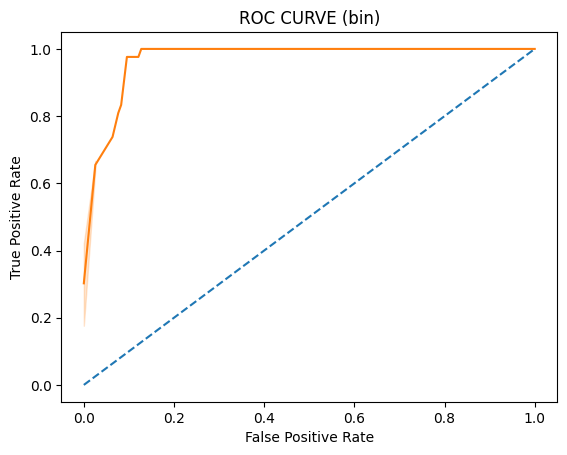

In [9]:
from sklearn.metrics import roc_curve, roc_auc_score
y_scores= log_reg.predict_proba(X_test_encoded)
fpr, tpr, thresholds= roc_curve(y_test, y_scores[:,1])
sns.lineplot(x=[0,1],y=[0,1], linestyle="--")
sns.lineplot(x=fpr, y=tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC CURVE (bin)")
plt.show()

In [10]:
auc= roc_auc_score(y_test, y_scores[:,1])
print(f"AUC: {auc}")

AUC: 0.97300576281468


**#AUC of 0.97 is very good with an accuracy of 90% text.**

In [12]:
import pandas as pd
from pandas import DatetimeIndex
import datetime
import numpy as np
import matplotlib.pyplot as plt

In [13]:
Pup = pd.read_csv('US-pumpkins.csv')

Pup.head()

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,Mostly High,Origin,Origin District,Item Size,Color,Environment,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.0,280.0,270.0,280.0,MARYLAND,NaN,lge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.0,280.0,270.0,280.0,MARYLAND,NaN,lge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,160.0,DELAWARE,NaN,med,ORANGE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,160.0,VIRGINIA,NaN,med,ORANGE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.0,100.0,90.0,100.0,MARYLAND,NaN,lge,ORANGE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [15]:
Month = DatetimeIndex(Pup['Date']).month
Price = (Pup['High Price'] + Pup['Low Price']) / 2
 #add a col day of the year
Pup['Day of Year'] = DatetimeIndex(Pup['Date']).dayofyear

In [16]:
pumkins = pd.DataFrame({
                        'City': Pup['City Name'],
                        'Month': Month,
                        'Date': Pup['Date'],
                        'Variety': Pup['Variety'],
                        'Day of Year': Pup['Day of Year'],
                        'Package': Pup['Package'],
                        'Price': Price,
                        'Low Price': Pup['Low Price'],
                        'High Price': Pup['High Price']
                         })

In [17]:
pumkins = pumkins[pumkins['Package'].str.contains('bushel', case=True, regex= True)].reset_index(drop=True)

In [18]:
pumkins.loc[pumkins['Package'].str.contains('1 1/9 bushel' ), 'Price'] = pumkins['Price'] / (1+1/9)
pumkins.loc[pumkins['Package'].str.contains('1/2 bushel' ), 'Price'] = pumkins['Price'] / (1/2)

In [19]:
pumkins

,City,Month,Date,Variety,Day of Year,Package,Price,Low Price,High Price
0,BALTIMORE,9,9/24/16,PIE TYPE,268,1 1/9 bushel cartons,13.50,15.00,15.0
1,BALTIMORE,9,9/24/16,PIE TYPE,268,1 1/9 bushel cartons,16.20,18.00,18.0
2,BALTIMORE,10,10/1/16,PIE TYPE,275,1 1/9 bushel cartons,16.20,18.00,18.0
3,BALTIMORE,10,10/1/16,PIE TYPE,275,1 1/9 bushel cartons,15.30,17.00,17.0
4,BALTIMORE,10,10/8/16,PIE TYPE,282,1 1/9 bushel cartons,13.50,15.00,15.0
...,...,...,...,...,...,...,...,...,...
410,ST. LOUIS,9,9/30/16,MINIATURE,274,1/2 bushel cartons,30.00,15.00,15.0
411,ST. LOUIS,9,9/30/16,MINIATURE,274,1/2 bushel cartons,28.75,13.75,15.0
412,ST. LOUIS,9,9/30/16,MINIATURE,274,1/2 bushel cartons,25.75,10.75,15.0
413,ST. LOUIS,9,9/30/16,MINIATURE,274,1/2 bushel cartons,24.00,12.00,12.0


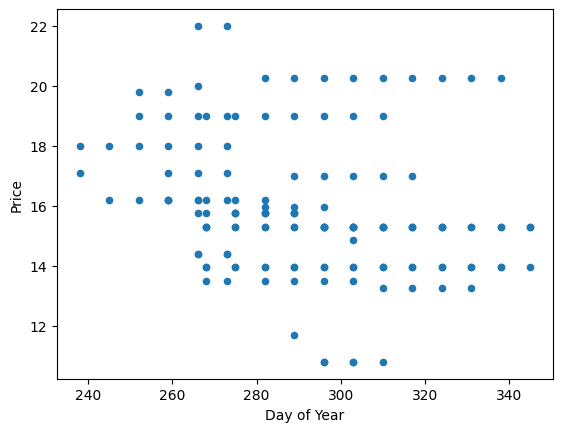

In [20]:
PI_pumkins = pumkins[pumkins['Variety'] == 'PIE TYPE']
PI_pumkins.plot.scatter(x='Day of Year', y='Price')
plt.show()

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [22]:
X= pumkins['Day of Year'].to_numpy().reshape(-1,1)
y = pumkins['Price']

X_train, X_test, y_train, y_test =  train_test_split(X,y, test_size = 0.2, random_state = 42)
Lin_reg = LinearRegression()
Lin_reg.fit(X_train, y_train)
y_pred = Lin_reg.predict(X_test)
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R^2 Score:', r2_score(y_test, y_pred))

Mean Squared Error: 108.25839657480121
R^2 Score: -0.0026328620898468102


In [23]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
pipeline = Pipeline([('poly_features', PolynomialFeatures(degree=2)),
                     ('lin_reg', LinearRegression())])

pipeline.fit(X_train, y_train)
y_pred_poly = pipeline.predict(X_test)
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_poly)))
print('R^2 Score:', r2_score(y_test, y_pred_poly))

RMSE: 10.199782438559863
R^2 Score: 0.03647683338331453


# Regression Model Assignment

In [24]:
salary_data= pd.read_csv("ds_salaries.csv")
salary_data.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


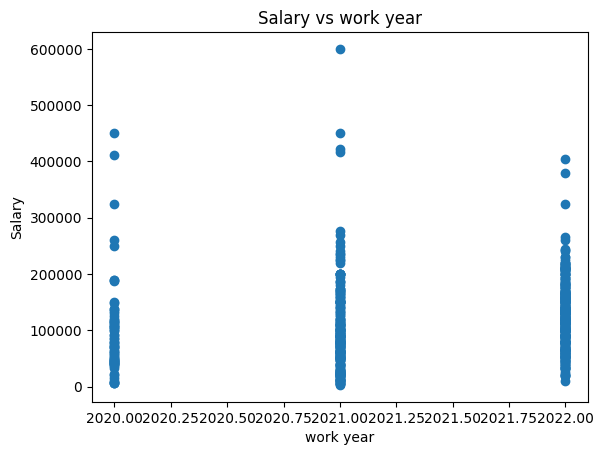

In [25]:
plt.scatter(salary_data['work_year'], salary_data['salary_in_usd'])
plt.xlabel('work year')
plt.ylabel('Salary')
plt.title('Salary vs work year')
plt.show()

In [26]:
X = salary_data[['work_year']]  # used a double bracket to convert to a Dataframe
y = salary_data['salary_in_usd']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#lets check the accuracy and rmse by finding the sqrt of mse

RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
R2_score = r2_score(y_test, y_pred)
print(f'RMSE:{RMSE}, \nR2_score:{R2_score}' )

RMSE:62475.69875990706, 
R2_score:-0.018432481112535815


In [27]:
mean_salary = salary_data['salary_in_usd'].mean()
rmse_percentage = (RMSE/mean_salary) * 100
print(f'RMSE_%: {rmse_percentage}')

RMSE_%: 55.63391259548873
